In [1]:
import pandas as pd

# Load the dataset
file_path = "Tayko_classified.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   sequence_number       2000 non-null   int64
 1   US                    2000 non-null   int64
 2   source_a              2000 non-null   int64
 3   source_c              2000 non-null   int64
 4   source_b              2000 non-null   int64
 5   source_d              2000 non-null   int64
 6   source_e              2000 non-null   int64
 7   source_m              2000 non-null   int64
 8   source_o              2000 non-null   int64
 9   source_h              2000 non-null   int64
 10  source_r              2000 non-null   int64
 11  source_s              2000 non-null   int64
 12  source_t              2000 non-null   int64
 13  source_u              2000 non-null   int64
 14  source_p              2000 non-null   int64
 15  source_x              2000 non-null   int64
 16  source

(None,
    sequence_number  US  source_a  source_c  source_b  source_d  source_e  \
 0                1   1         0         0         1         0         0   
 1                2   1         0         0         0         0         1   
 2                3   1         0         0         0         0         0   
 3                4   1         0         1         0         0         0   
 4                5   1         0         1         0         0         0   
 
    source_m  source_o  source_h  ...  source_w  Freq  last_update_days_ago  \
 0         0         0         0  ...         0     2                  3662   
 1         0         0         0  ...         0     0                  2900   
 2         0         0         0  ...         0     2                  3883   
 3         0         0         0  ...         0     1                   829   
 4         0         0         0  ...         0     1                   869   
 
    1st_update_days_ago  Web order  Gender=male  Addr

In [2]:
# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics of numerical columns
summary_stats = df.describe()

missing_values, summary_stats


(sequence_number         0
 US                      0
 source_a                0
 source_c                0
 source_b                0
 source_d                0
 source_e                0
 source_m                0
 source_o                0
 source_h                0
 source_r                0
 source_s                0
 source_t                0
 source_u                0
 source_p                0
 source_x                0
 source_w                0
 Freq                    0
 last_update_days_ago    0
 1st_update_days_ago     0
 Web order               0
 Gender=male             0
 Address_is_res          0
 Purchase                0
 Spending                0
 customer_value          0
 dtype: int64,
        sequence_number           US     source_a     source_c     source_b  \
 count      2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
 mean       1000.500000     0.824500     0.126500     0.056000     0.060000   
 std         577.494589     0.380489     0.332

Matplotlib is building the font cache; this may take a moment.


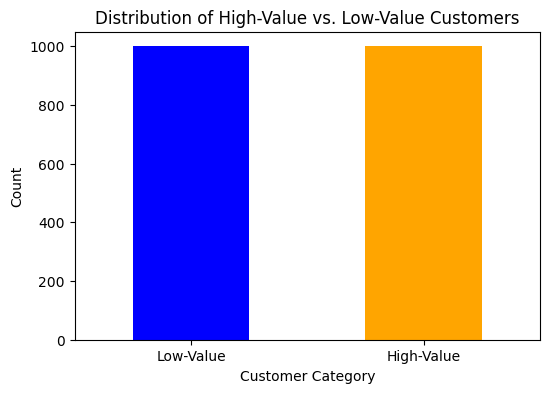

In [3]:
import matplotlib.pyplot as plt

# Visualizing the distribution of customer categories
plt.figure(figsize=(6,4))
df['customer_value'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xticks(ticks=[0,1], labels=['Low-Value', 'High-Value'], rotation=0)
plt.xlabel("Customer Category")
plt.ylabel("Count")
plt.title("Distribution of High-Value vs. Low-Value Customers")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting features (drop sequence_number as it's just an ID)
X = df.drop(columns=['sequence_number', 'customer_value'])
y = df['customer_value']

# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing numerical features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
from sklearn.linear_model import LogisticRegression

# Building Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Evaluating model performance
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix, accuracy, precision, recall, f1


(array([[200,   0],
        [  0, 200]], dtype=int64),
 1.0,
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0))

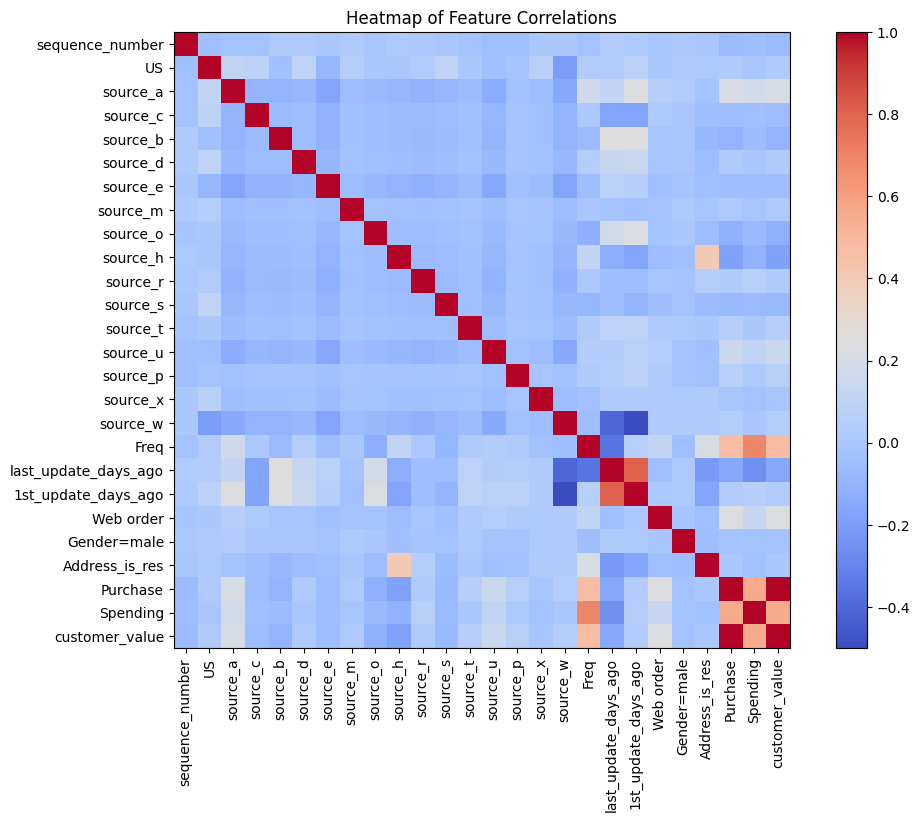

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap using Matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Heatmap of Feature Correlations")
plt.show()


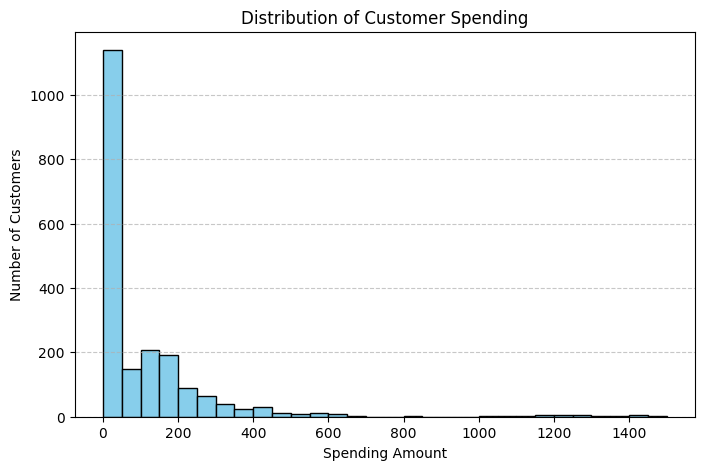

In [16]:
plt.figure(figsize=(8, 5))
plt.hist(df['Spending'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Spending Amount")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Spending")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
